In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib as mpl

In [2]:
df=pd.read_csv('../../0 data preparation/All.csv')
df_dropduplicates=df.drop_duplicates(subset='ID')

### 1. Part distribution of terpenoids

In [3]:
df_parts=df['Part'].value_counts()
df_parts=pd.DataFrame(df_parts)
df_parts.reset_index(inplace=True)
df_parts.rename(columns={'index':'Parts','Location':'Counts'},inplace=True)
data=[]
for i in range(len(df_parts)):
    # Part information
    part=df_parts['Parts'][i]
    compounds=df[df['Part']==part]
    # Remove duplicates
    compounds_dropduplicates=compounds.drop_duplicates(subset='ID')
    percentages=round(len(compounds_dropduplicates)/len(df_dropduplicates)*100,2)
    min_content=min(compounds['Content(%)'])
    max_content=max(compounds['Content(%)'])
    data.append((part,len(compounds_dropduplicates),percentages,str(min_content)+'~'+str(max_content)))
data=pd.DataFrame(data,columns=['Parts','Counts','Percentages(%)','Content(%)'])
data = data.sort_values('Counts', ascending=False)
data.reset_index(drop=True,inplace=True)
data

,Parts,Counts,Percentages(%),Content(%)
0,Roots,1534,24.03,1e-06~3.744898
1,Aerial parts,1306,20.46,3e-06~0.166667
2,Whole plants,1100,17.23,3e-06~2.6
3,Leaves,870,13.63,1e-06~2.522321
4,Barks,472,7.39,3e-06~1.162791
5,Stems,459,7.19,1e-06~2.533589
6,Fruits,351,5.50,3e-06~0.304414
7,Seeds,334,5.23,1e-05~0.297586
8,Subterraneous stems,270,4.23,4e-06~0.128571
9,Flowers,99,1.55,9e-06~0.461538


### Barplot

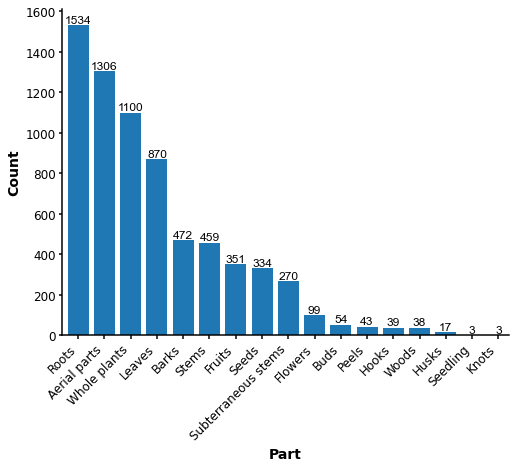

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
bars = plt.bar(data['Parts'], data['Counts'])
plt.xlabel('Part', fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14, fontweight='bold')
plt.rcParams['font.family'] = 'Arial'
plt.gca().spines['left'].set_linewidth(1.5)
plt.gca().spines['bottom'].set_linewidth(1.5)
plt.gca().spines['right'].set_linewidth(0)
plt.gca().spines['top'].set_linewidth(0)
plt.tick_params(width=1.5)
plt.xticks(rotation=45, ha='right',fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(-0.6, len(data['Parts']) - 0.6)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(height), ha='center', va='bottom', fontsize=12)
plt.savefig('bar.tif', dpi=600, bbox_inches='tight')
plt.show()

### 2. Part distribution of various types of terpenoids

In [5]:
Part=['Roots','Aerial parts','Whole plants','Leaves','Barks','Stems','Fruits','Seeds','Subterraneous stems','Flowers','Buds','Peels','Hooks','Woods','Husks','Seedling','Knots']
Type=['Monoterpenoids','Sesquiterpenoids','Diterpenoids','Triterpenoids']
Data=pd.DataFrame(Part,columns=[''])
for i in Type:
    data=[]
    for j in Part:
        df_Parts_Types=df[(df['Type']==i)&(df['Part']==j)]
        df_Parts_Types_dropduplicates=df_Parts_Types.drop_duplicates(subset='ID')
        data.append(len(df_Parts_Types_dropduplicates))
    Data[i]=data
Data.to_csv('Type_Parts.csv',index=False)
Data

,,Monoterpenoids,Sesquiterpenoids,Diterpenoids,Triterpenoids
0,Roots,164,342,283,745
1,Aerial parts,223,324,279,480
2,Whole plants,118,287,304,391
3,Leaves,95,192,217,366
4,Barks,98,54,55,265
5,Stems,108,51,66,234
6,Fruits,40,56,48,207
7,Seeds,30,21,72,211
8,Subterraneous stems,2,48,39,181
9,Flowers,18,33,12,36


### Heatmap

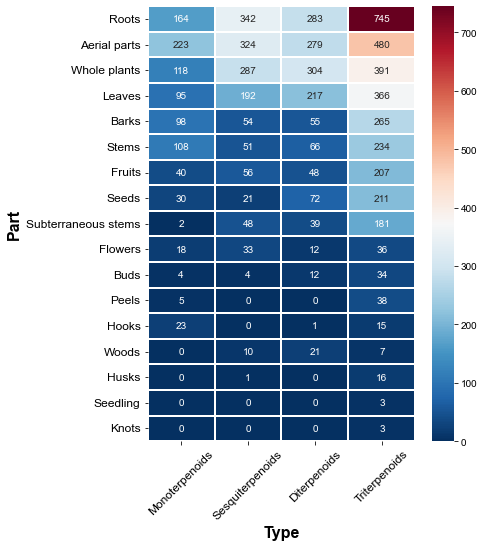

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('Type_Parts.csv',index_col=0)
plt.xlabel('Columns')
plt.ylabel('Rows')
ax=sns.heatmap(df, cmap='RdBu_r', linewidths=0.1, annot=True, fmt='.0f')
ax.set_xlabel('Type', fontsize=16, fontweight='bold')
ax.set_ylabel('Part', fontsize=16, fontweight='bold')
plt.yticks(rotation=0,fontsize=12)
plt.xticks(rotation=45,fontsize=12)
plt.rcParams['font.sans-serif'] = 'Arial'
fig = plt.gcf()
fig.set_size_inches(6,8)
plt.savefig('heatmap.tif', dpi=600, bbox_inches='tight')
plt.show()